In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
deliveries = pd.read_csv('Ipl Data/deliveries.csv')

In [3]:
deliveries=deliveries.replace(to_replace ="Rising Pune Supergiant", value ="Rising Pune Supergiants") 
deliveries=deliveries.replace(to_replace ="Delhi Daredevils", value ="Delhi Capitals") 
deliveries=deliveries.replace(to_replace ="Deccan Chargers", value ="Sunrisers Hyderabad")

In [34]:
deliveries[deliveries['inning']==1]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178949,11415,1,Mumbai Indians,Chennai Super Kings,20,2,KA Pollard,MJ McClenaghan,DJ Bravo,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178950,11415,1,Mumbai Indians,Chennai Super Kings,20,3,KA Pollard,MJ McClenaghan,DJ Bravo,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178951,11415,1,Mumbai Indians,Chennai Super Kings,20,4,KA Pollard,MJ McClenaghan,DJ Bravo,0,...,0,0,0,0,1,0,1,MJ McClenaghan,run out,F du Plessis
178952,11415,1,Mumbai Indians,Chennai Super Kings,20,5,KA Pollard,JJ Bumrah,DJ Bravo,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [6]:
total_runs = []
matches = []
batting_team = []
for match_no in deliveries['match_id'].unique():
    df = deliveries[(deliveries['match_id']==match_no) & (deliveries['inning']==1)]
    runs = df['total_runs'].sum()
    total_runs.append(runs)
    matches.append(match_no)
    batting_team.append(df['batting_team'].unique()[0])

In [9]:
df1 = pd.DataFrame()
df1['match_no'] = matches
df1['batting_team'] = batting_team
df1['total_runs'] = total_runs
df1

,match_no,batting_team,total_runs
0,1,Sunrisers Hyderabad,207
1,2,Mumbai Indians,184
2,3,Gujarat Lions,183
3,4,Rising Pune Supergiants,163
4,5,Royal Challengers Bangalore,157
...,...,...,...
751,11347,Kolkata Knight Riders,143
752,11412,Chennai Super Kings,136
753,11413,Sunrisers Hyderabad,171
754,11414,Delhi Capitals,155


In [11]:
final_runs = []
final_team = []
for team in df1['batting_team'].unique():
    max_run = df1[df1['batting_team']==team]['total_runs'].max()
    final_runs.append(max_run)
    final_team.append(team)
final_runs, final_team

([233, 230, 208, 195, 263, 250, 231, 232, 246, 231, 178, 192],
 ['Sunrisers Hyderabad',
  'Mumbai Indians',
  'Gujarat Lions',
  'Rising Pune Supergiants',
  'Royal Challengers Bangalore',
  'Kolkata Knight Riders',
  'Delhi Capitals',
  'Kings XI Punjab',
  'Chennai Super Kings',
  'Rajasthan Royals',
  'Kochi Tuskers Kerala',
  'Pune Warriors'])

C:\Users\kavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

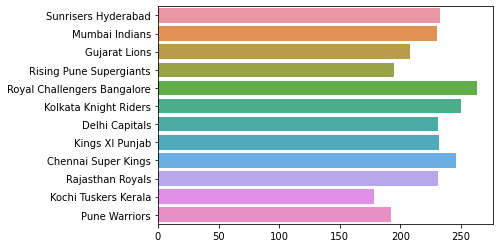

In [13]:
sns.barplot(final_runs, final_team)